Iteracja 0: x=37.9998, y=14.0000, f=512072.1596
Iteracja 20: x=28.1429, y=1.0000, f=30261.0496
Iteracja 40: x=23.2006, y=1.0000, f=18032.3050
Iteracja 60: x=19.6151, y=1.0000, f=11605.5786
Iteracja 80: x=16.8943, y=1.0000, f=7907.5783
Iteracja 100: x=14.7584, y=1.0000, f=5629.8502
Iteracja 120: x=13.0369, y=1.0000, f=4150.5087
Iteracja 140: x=11.6197, y=1.0000, f=3147.9745
Iteracja 160: x=10.4324, y=1.0000, f=2444.4651
Iteracja 180: x=9.4232, y=1.0000, f=1936.2074
Iteracja 200: x=8.5548, y=1.0000, f=1559.8346
Iteracja 220: x=7.7995, y=1.0000, f=1275.1534
Iteracja 240: x=7.1366, y=1.0000, f=1055.8260
Iteracja 260: x=6.5501, y=1.0000, f=884.1011
Iteracja 280: x=6.0273, y=1.0000, f=747.7163
Iteracja 300: x=5.5585, y=1.0000, f=638.0150
Iteracja 320: x=5.1357, y=1.0000, f=548.7674
Iteracja 340: x=4.7523, y=1.0000, f=475.4116
Iteracja 360: x=4.4032, y=1.0000, f=414.5554
Iteracja 380: x=4.0838, y=1.0000, f=363.6402
Iteracja 400: x=3.7906, y=1.0000, f=320.7117
Iteracja 420: x=3.5204, y=1.0000,

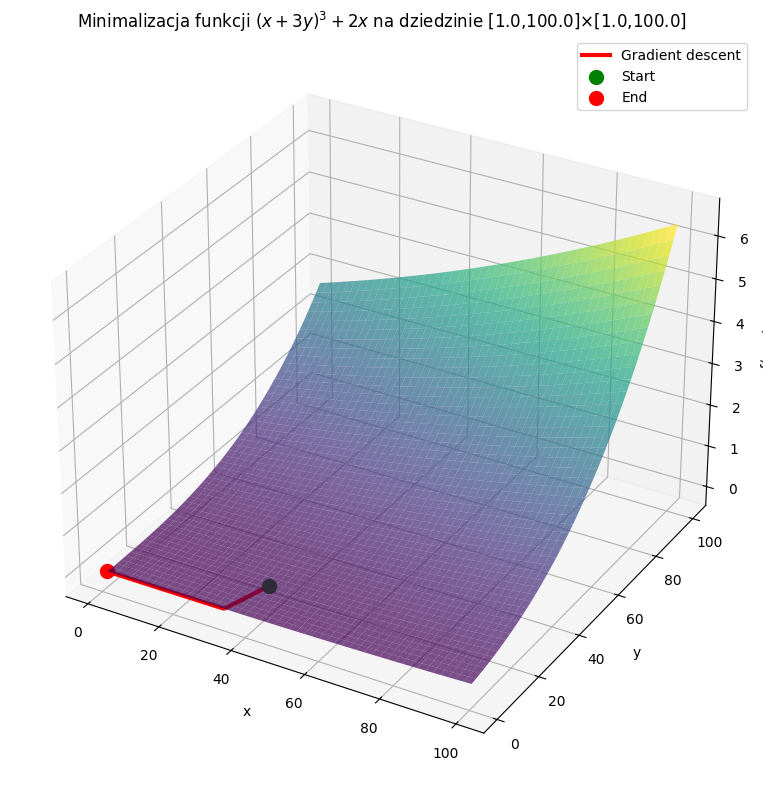

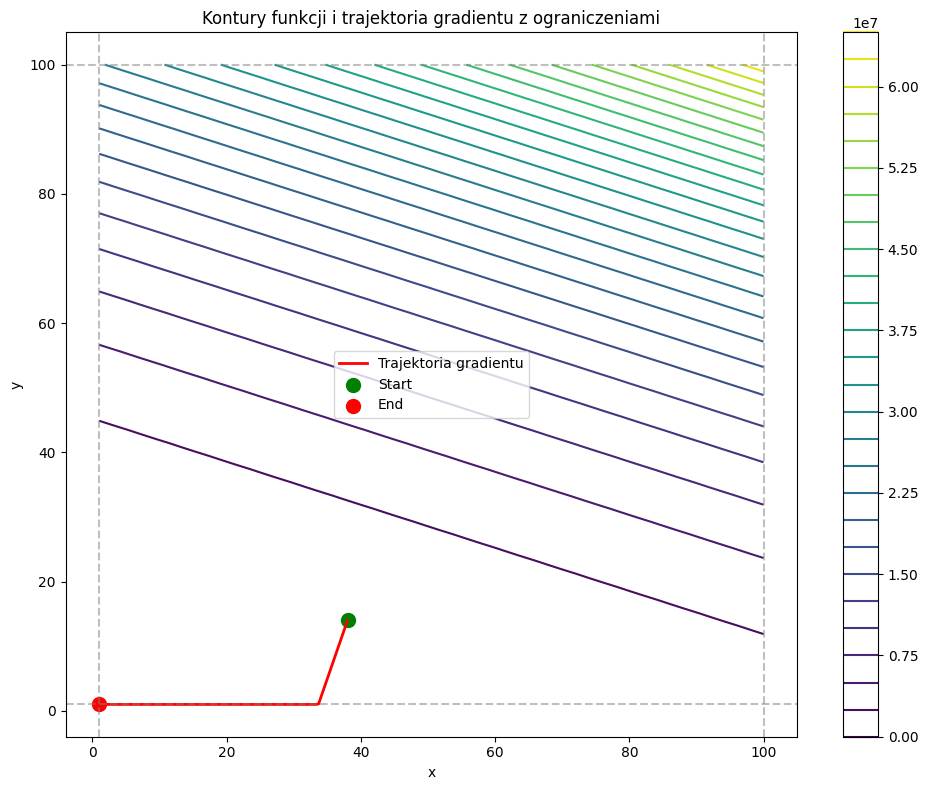

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definicja funkcji i jej gradientu
def f(x, y):
    return (x + 3*y)**3 + 2*x

def grad_f(x, y):
    df_dx = 3*(x + 3*y)**2 + 2
    df_dy = 9*(x + 3*y)**2
    return np.array([df_dx, df_dy])

# Parametry gradientu prostego z ograniczeniami
learning_rate = 0.0001
x, y = 50.0, 50.0  # punkt startowy
n_iterations = 1000

# Ograniczenia dziedziny
x_min, x_max = 1.0, 100.0
y_min, y_max = 1.0, 100.0

def project_to_domain(x_val, y_val):
    """Projektuje punkty z powrotem do dziedziny"""
    x_val = max(x_min, min(x_max, x_val))
    y_val = max(y_min, min(y_max, y_val))
    return x_val, y_val

# Listy do śledzenia trajektorii
x_list, y_list, cost_list = [], [], []

# Pętla gradientu prostego Z projekcją
for i in range(n_iterations):
    current_grad = grad_f(x, y)
    x -= learning_rate * current_grad[0]
    y -= learning_rate * current_grad[1]
    
    # projekcja: przywróć x, y do dziedziny
    x, y = project_to_domain(x, y)
    
    current_cost = f(x, y)
    
    x_list.append(x)
    y_list.append(y)
    cost_list.append(current_cost)
    
    if i % 20 == 0:
        print(f"Iteracja {i}: x={x:.4f}, y={y:.4f}, f={current_cost:.4f}")

print(f"\nMinimum w punkcie: x={x:.4f}, y={y:.4f}, f={f(x, y):.4f}")

# Sprawdzenie wartości w rogach dziedziny
print("\nSprawdzenie wartości w rogach dziedziny:")
print(f"f({x_min}, {y_min}) = {f(x_min, y_min):.6f}")
print(f"f({x_min}, {y_max}) = {f(x_min, y_max):.6f}")
print(f"f({x_max}, {y_min}) = {f(x_max, y_min):.6f}")
print(f"f({x_max}, {y_max}) = {f(x_max, y_max):.6f}")

# Wizualizacja 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Siatka punktów
X_vals = np.linspace(x_min, x_max, 50)
Y_vals = np.linspace(y_min, y_max, 50)
X, Y = np.meshgrid(X_vals, Y_vals)
Z = f(X, Y)

# Powierzchnia funkcji
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, rstride=1, cstride=1)

# Trajektoria gradientu
ax.plot(x_list, y_list, cost_list, 'r-', linewidth=3, label='Gradient descent')
ax.scatter(x_list[0], y_list[0], cost_list[0], color='green', s=100, label='Start')
ax.scatter(x_list[-1], y_list[-1], cost_list[-1], color='red', s=100, label='End')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title(f'Minimalizacja funkcji $(x+3y)^3 + 2x$ na dziedzinie [{x_min},{x_max}]×[{y_min},{y_max}]')
ax.legend()

plt.tight_layout()
plt.show()

# Dodatkowa wizualizacja 2D (kontury)
fig2, ax2 = plt.subplots(figsize=(10, 8))
contour = ax2.contour(X, Y, Z, levels=30, cmap='viridis')
ax2.plot(x_list, y_list, 'r-', linewidth=2, label='Trajektoria gradientu')
ax2.scatter(x_list[0], y_list[0], color='green', s=100, label='Start')
ax2.scatter(x_list[-1], y_list[-1], color='red', s=100, label='End')

# Dodaj linie ograniczające dziedzinę
ax2.axvline(x=x_min, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=x_max, color='gray', linestyle='--', alpha=0.5)
ax2.axhline(y=y_min, color='gray', linestyle='--', alpha=0.5)
ax2.axhline(y=y_max, color='gray', linestyle='--', alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Kontury funkcji i trajektoria gradientu z ograniczeniami')
ax2.set_xlim(x_min-5, x_max+5)
ax2.set_ylim(y_min-5, y_max+5)
ax2.legend()
plt.colorbar(contour, ax=ax2)
plt.tight_layout()
plt.show()

In [7]:
import numpy as np

# Architektura 
nn_architecture = [
    {"input_dim": 2, "output_dim": 2, "activation": "relu"},
    {"input_dim": 2, "output_dim": 1, "activation": "relu"}
]

# Inicjalizacja warstw
def init_layers(nn_architecture, seed=99):
    np.random.seed(seed)
    params_values = {}
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
    return params_values

# Funkcje aktywacji
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

# Propagacja w przód
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    if activation == "relu":
        activation_func = relu
    elif activation == "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Nieobsługiwana funkcja aktywacji')
    return activation_func(Z_curr), Z_curr

def full_forward_propagation(X, params_values, nn_architecture):
    memory = {}
    A_curr = X
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr
        activ_function_curr = layer["activation"]
        W_curr = params_values["W" + str(layer_idx)]
        b_curr = params_values["b" + str(layer_idx)]
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
    return A_curr, memory

# Propagacja wstecz
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    m = A_prev.shape[1]
    if activation == "relu":
        backward_activation_func = relu_backward
    elif activation == "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Nieobsługiwana funkcja aktywacji')
    
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    dA_prev = np.dot(W_curr.T, dZ_curr)
    
    return dA_prev, dW_curr, db_curr

def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    m = Y.shape[1]
    Y = Y.reshape(Y_hat.shape)
    
    # Pochodna strat względem A_ostatnia
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat))
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx_curr = layer_idx_prev + 1
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values

# Test na przykładowych danych
# Przykładowe dane wejściowe (4 próbki, 2 cechy)
X = np.array([[1, 2, 3, 4], [2, 3, 4, 5]])  # kształt (2, 4)
Y = np.array([[0, 1, 1, 0]])  # kształt (1, 4)

params_values = init_layers(nn_architecture, seed=99)
print("Inicjalizowane parametry:")
for key, val in params_values.items():
    print(f"{key}: {val.shape}")

# Propagacja w przód
Y_hat, memory = full_forward_propagation(X, params_values, nn_architecture)
print(f"\nPrzewidywania Y_hat: {Y_hat}")
print(f"Rzeczywiste Y: {Y}")

# Propagacja wstecz
grads_values = full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture)
print("\nGradienty obliczone:")
for key, val in grads_values.items():
    print(f"{key}: {val}")

Inicjalizowane parametry:
W1: (2, 2)
b1: (2, 1)
W2: (1, 2)
b2: (1, 1)

Przewidywania Y_hat: [[0.0412497  0.06902866 0.09680762 0.12458659]]
Rzeczywiste Y: [[0 1 1 0]]

Gradienty obliczone:
dW2: [[-3.67829358 -2.90510668]]
db2: [[-5.65778973]]
dW1: [[-1.0261104  -1.45337564]
 [-1.12185713 -1.58899065]]
db1: [[-0.42726524]
 [-0.46713351]]
